In [1]:
from parameters import *
from functions import *
from PDE_solutions import *

walks = 10000
dt =T/200
print(X0)
print(PDEProb)

[0, 3]
6.293701166092087e-05


In [6]:
R_in = np.sqrt(X0[0]**2 + X0[1]**2)
R_f = R

m = 10

R_list = np.linspace(R_in,R_f,m)

N_list = np.ones(m-1) * 3
N_list[0] = 14
N_list[1] = 10
N_list[2] = 7
N_list[3] = 5

# Splitting method

Checking dimensionality of H, Ns and Y.
Radiuses: [3.    2.778 2.556 2.333 2.111 1.889 1.667 1.444 1.222 1.   ]
Walks per stage: [14. 10.  7.  5.  3.  3.  3.  3.  3.]
Timestep: 0.01


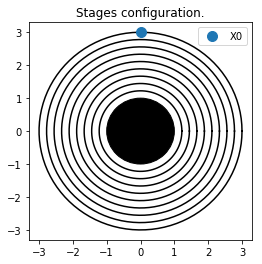


Splitting method starts...



Splitting method results:
	Estimated probability: 1.595700008398421e-05
	Estimated variance: 5.196469092245106e-06
PDE result is:  6.293701166092087e-05


In [7]:
np.random.seed(SEED) #scipy is based on the numpy seed
H = np.zeros(R_list.shape[0]-1) #hits
Y = np.zeros(int(N_list[0]))
Y_SM, H_SM = SplittingMethod(X0, 0., 0.01, N_list, R_list, Y, H, 0, np.nan)
print('\n\n')
if H_SM is not np.nan:
    mean_SM, std = ComputeEstimatesSplittingMethod(Y_SM, N_list, PDEProb = PDEProb)

# Splitting method with balanced growth

Splitting method with balanced growth.

Radiuses: [3.    2.778 2.556 2.333 2.111 1.889 1.667 1.444 1.222 1.   ]
Timestep: 0.01


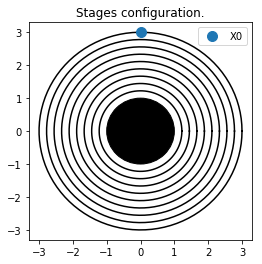


Pilot run with walks per stage:  [14. 10.  7.  5.  3.  3.  3.  3.  3.]
Pilot run starts...
Pilot run terminated.
Pilot run results: 
		H = [  7.  28.  77. 122.  98.  81.  57.  38.  22.]
		p_i = [0.5   0.4   0.393 0.317 0.268 0.276 0.235 0.222 0.193] 
		N = [ 6  9  9 12 12 12 15 15 18]

Calling the splitting method.


KeyboardInterrupt: 

In [8]:
Y_SM, H_SM, N_SM = SplittingMethodBalancedGrowth(X0, 0.01, R_list, N_list, T = 1, verbose = 1, seed = SEED)
print('\n\n')
if H is not np.nan:
    mean_SM_BG, std = ComputeEstimatesSplittingMethod(Y_SM, N_SM, PDEProb)

# Error comparison

In [5]:
print('Splitting method (basic version) relative error:   ', np.abs(PDEProb - mean_SM)/PDEProb)
print('Splitting method (balanced growth) relative error: ', np.abs(PDEProb - mean_SM_BG)/PDEProb)

Splitting method (basic version) relative error:    1.0
Splitting method (balanced growth) relative error:  0.9856784333372235
